In [1]:
from fastai.tabular.all import *
from transfertab.utils import *
from transfertab.transfer import *
from transfertab.extract import *
from fastcore.xtras import *
from fastai.learner import *
import torch
import numpy as np
from fastai.interpret import *

In [2]:
import pandas as pd
df = pd.read_csv("bank-additional-full.csv")

In [3]:
df.head()

  age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0                                                                                        56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
1                                                                                 57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
2                                                                                     37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
3                                                                                           40;"admin.";"mar

In [4]:
import pandas as pd
df = pd.read_csv("bank-additional-full.csv", delimiter=';')

In [5]:
df.head()

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [6]:
df.shape

(41188, 21)

In [7]:
41188 * 0.3

12356.4

In [8]:
41188 * 0.7

28831.6

In [9]:
dfA = df.iloc[0:28831]
dfB = df.iloc[28831:-1]

In [10]:
dfA.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
contcols = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
catcols = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 
	'month', 'day_of_week','poutcome']
target = 'y'

In [12]:
contcols = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
catcols = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 
	'month', 'day_of_week','poutcome']
target = 'y'

In [13]:
splitsA = RandomSplitter(valid_pct=0.2)(range_of(dfA))
toA = TabularPandas(dfA, procs=[Categorify, FillMissing, Normalize],
                   cat_names=catcols,
                   cont_names=contcols,
                   y_names='Total Costs',
                   splits=splitsA)
dlsA = toA.dataloaders(bs=512)
learnA = tabular_learner(dlsA, metrics=accuracy)

In [14]:
splitsA = RandomSplitter(valid_pct=0.2)(range_of(dfA))
toA = TabularPandas(dfA, procs=[Categorify, FillMissing, Normalize],
                   cat_names=catcols,
                   cont_names=contcols,
                   y_names=target,
                   splits=splitsA)
dlsA = toA.dataloaders(bs=512)
learnA = tabular_learner(dlsA, metrics=accuracy)

In [15]:
# cbs=[WandbCallback(log="all", dataset_name="health2011", n_preds=128, seed=1), SaveModelCallback()]
learnA.fit_one_cycle(5)

In [16]:
learnA.fit_one_cycle(5)

In [17]:
# cbs=[WandbCallback(log="all", dataset_name="health2011", n_preds=128, seed=1), SaveModelCallback()]
learnA.fit_one_cycle(20)

In [18]:
splitsA = RandomSplitter(valid_pct=0.2)(range_of(dfA))
toA = TabularPandas(dfA, procs=[Categorify, FillMissing, Normalize],
                   cat_names=catcols,
                   cont_names=contcols,
                   y_names=target,
                   splits=splitsA)
dlsA = toA.dataloaders(bs=512)
learnA = tabular_learner(dlsA, metrics=accuracy)

In [19]:
# cbs=[WandbCallback(log="all", dataset_name="health2011", n_preds=128, seed=1), SaveModelCallback()]
learnA.fit_one_cycle(30)

In [20]:
import wandb
from fastai.callback.wandb import *

In [21]:
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp4c', 
    job_type='basetrain', 
    tags=['base', 'bank'], 
    name='modelA training',
    notes="Training modelA from which we'll take embeddings",
    reinit=True
)

In [22]:
splitsA = RandomSplitter(valid_pct=0.2)(range_of(dfA))
toA = TabularPandas(dfA, procs=[Categorify, FillMissing, Normalize],
                   cat_names=catcols,
                   cont_names=contcols,
                   y_names=target,
                   splits=splitsA)
dlsA = toA.dataloaders(bs=512)
learnA = tabular_learner(dlsA, metrics=accuracy)

In [23]:
cbs=[WandbCallback(log="all", dataset_name="bank-additional-full (first .7)", n_preds=128, seed=1), SaveModelCallback()]
learnA.fit_one_cycle(50)

In [24]:
splitsA = RandomSplitter(valid_pct=0.2)(range_of(dfA))
toA = TabularPandas(dfA, procs=[Categorify, FillMissing, Normalize],
                   cat_names=catcols,
                   cont_names=contcols,
                   y_names=target,
                   splits=splitsA)
dlsA = toA.dataloaders(bs=512)
learnA = tabular_learner(dlsA, metrics=accuracy)

In [25]:
cbs=[WandbCallback(log="all", dataset_name="bank-additional-full (first .7)", n_preds=128, seed=1), SaveModelCallback()]
learnA.fit_one_cycle(50, cbs=cbs)

In [26]:
learnA.recorder.plot_loss()

In [27]:
torch.save(learnA.model.state_dict(),"modelA_state_dict")

In [28]:
catdict = {col:list(learnA.dls.categorify.classes[col]) for col in catcols}

In [29]:
extractembeds(learnA.model, catdict, transfercats=catcols, allcats=catcols, path="learnA_extracts", kind="json")

{'job': {'classes': ['#na#',
   'admin.',
   'blue-collar',
   'entrepreneur',
   'housemaid',
   'management',
   'retired',
   'self-employed',
   'services',
   'student',
   'technician',
   'unemployed',
   'unknown'],
  'embeddings': [[0.008318760432302952,
    0.00441267155110836,
    -0.007023473735898733,
    -0.012475866824388504,
    0.0151326023042202,
    0.017301613464951515,
    0.00042546517215669155],
   [-0.015240681357681751,
    -0.01095271110534668,
    0.03314436599612236,
    -0.08949369937181473,
    -0.03206564858555794,
    -0.001056714914739132,
    0.002649565227329731],
   [0.09490272402763367,
    0.030090143904089928,
    0.08460000902414322,
    -0.04267774149775505,
    -0.016363419592380524,
    -0.03613348305225372,
    0.045366402715444565],
   [-0.02455057203769684,
    -0.047547582536935806,
    -0.08470889180898666,
    0.05608623847365379,
    0.013738198205828667,
    -0.08698925375938416,
    0.03591616451740265],
   [0.011158350855112076,
    

In [30]:
wandb.finish()

In [31]:
splitsB = RandomSplitter(valid_pct=0.2)(range_of(dfB))
toB = TabularPandas(dfB, procs=[Categorify, FillMissing, Normalize],
                   cat_names = catcols,
                   cont_names = contcols,
                   y_names=target,
                   splits=splitsB)
dlsB = toB.dataloaders(bs=256)

In [32]:
learnB = tabular_learner(dlsB, metrics=accuracy)

In [33]:
embeds = extractembeds(learnA.model, catdict, transfercats=catcols, allcats=catcols, path="learnA_extracts", kind="json")

In [34]:
get_metadict_skeleton(dfB, path='bank_meta.json')

{'job': {'mapped_cat': '',
  'classes_info': {'admin.': [],
   'blue-collar': [],
   'entrepreneur': [],
   'self-employed': [],
   'student': [],
   'services': [],
   'management': [],
   'technician': [],
   'retired': [],
   'unemployed': [],
   'housemaid': [],
   'unknown': []}},
 'marital': {'mapped_cat': '',
  'classes_info': {'married': [],
   'single': [],
   'divorced': [],
   'unknown': []}},
 'education': {'mapped_cat': '',
  'classes_info': {'basic.9y': [],
   'high.school': [],
   'university.degree': [],
   'basic.4y': [],
   'basic.6y': [],
   'unknown': [],
   'professional.course': [],
   'illiterate': []}},
 'default': {'mapped_cat': '', 'classes_info': {'no': [], 'unknown': []}},
 'housing': {'mapped_cat': '',
  'classes_info': {'yes': [], 'no': [], 'unknown': []}},
 'loan': {'mapped_cat': '',
  'classes_info': {'no': [], 'yes': [], 'unknown': []}},
 'contact': {'mapped_cat': '',
  'classes_info': {'cellular': [], 'telephone': []}},
 'month': {'mapped_cat': '',
  '

In [35]:
# catdict = getcatdict(df, catcols)
metadict = {}
for (cat, classes) in catdict.items():
	metadict[cat] = {'mapped_cat': cat, 'classes_info': {clas: clas for clas in classes}}
	if path != None:
		with open(path, 'w') as fp:
			json.dump(metadict, fp)

In [36]:
# catdict = getcatdict(df, catcols)
metadict = {}
for (cat, classes) in catdict.items():
	metadict[cat] = {'mapped_cat': cat, 'classes_info': {clas: clas for clas in classes}}
with open('bank_meta.json', 'w') as fp:
	json.dump(metadict, fp)

In [37]:
# transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
# catcolsB = tuple(learnB.dls.cat_names)
# catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    catcols, 
    newcatcols=catcols, 
    oldcatcols=catcols, 
    oldcatdict=catdict, 
    newcatdict=catdict)

In [38]:
learnA.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(13, 7)
    (1): Embedding(5, 4)
    (2): Embedding(9, 5)
    (3): Embedding(4, 3)
    (4): Embedding(4, 3)
    (5): Embedding(4, 3)
    (6): Embedding(3, 3)
    (7): Embedding(10, 6)
    (8): Embedding(6, 4)
    (9): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=51, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [39]:
learnA.model.embeds

ModuleList(
  (0): Embedding(13, 7)
  (1): Embedding(5, 4)
  (2): Embedding(9, 5)
  (3): Embedding(4, 3)
  (4): Embedding(4, 3)
  (5): Embedding(4, 3)
  (6): Embedding(3, 3)
  (7): Embedding(10, 6)
  (8): Embedding(6, 4)
  (9): Embedding(4, 3)
)

In [40]:
learnB.model.embeds

ModuleList(
  (0): Embedding(13, 7)
  (1): Embedding(5, 4)
  (2): Embedding(9, 5)
  (3): Embedding(3, 3)
  (4): Embedding(4, 3)
  (5): Embedding(4, 3)
  (6): Embedding(3, 3)
  (7): Embedding(11, 6)
  (8): Embedding(6, 4)
  (9): Embedding(4, 3)
)

In [41]:
learnB.dls.cat_names

(#10) ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [42]:
catcols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [43]:
learnA.dls.categorify

Categorify -- {'classes': {'job': ['#na#', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'], 'marital': ['#na#', 'divorced', 'married', 'single', 'unknown'], 'education': ['#na#', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'], 'default': ['#na#', 'no', 'unknown', 'yes'], 'housing': ['#na#', 'no', 'unknown', 'yes'], 'loan': ['#na#', 'no', 'unknown', 'yes'], 'contact': ['#na#', 'cellular', 'telephone'], 'month': ['#na#', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct'], 'day_of_week': ['#na#', 'fri', 'mon', 'thu', 'tue', 'wed'], 'poutcome': ['#na#', 'failure', 'nonexistent', 'success']}}:
encodes: (object,object) -> encodes
decodes: (object,object) -> decodes

In [44]:
learnA.dls.categorify['default']

['#na#', 'no', 'unknown', 'yes']

In [45]:
learnB.dls.categorify['default']

['#na#', 'no', 'unknown']

In [46]:
learnB.dls.categorify['month']

['#na#', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']

In [47]:
learnA.dls.categorify['month']

['#na#', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct']

In [48]:
metadict={"job": {"mapped_cat": "job", "classes_info": {"#na#": "#na#", "admin.": "admin.", "blue-collar": "blue-collar", "entrepreneur": "entrepreneur", "housemaid": "housemaid", "management": "management", "retired": "retired", "self-employed": "self-employed", "services": "services", "student": "student", "technician": "technician", "unemployed": "unemployed", "unknown": "unknown"}}, "marital": {"mapped_cat": "marital", "classes_info": {"#na#": "#na#", "divorced": "divorced", "married": "married", "single": "single", "unknown": "unknown"}}, "education": {"mapped_cat": "education", "classes_info": {"#na#": "#na#", "basic.4y": "basic.4y", "basic.6y": "basic.6y", "basic.9y": "basic.9y", "high.school": "high.school", "illiterate": "illiterate", "professional.course": "professional.course", "university.degree": "university.degree", "unknown": "unknown"}}, "default": {"mapped_cat": "default", "classes_info": {"#na#": "#na#", "no": "no", "unknown": "unknown"}}, "housing": {"mapped_cat": "housing", "classes_info": {"#na#": "#na#", "no": "no", "unknown": "unknown", "yes": "yes"}}, "loan": {"mapped_cat": "loan", "classes_info": {"#na#": "#na#", "no": "no", "unknown": "unknown", "yes": "yes"}}, "contact": {"mapped_cat": "contact", "classes_info": {"#na#": "#na#", "cellular": "cellular", "telephone": "telephone"}}, "month": {"mapped_cat": "month", "classes_info": {"#na#": "#na#", "apr": "apr", "aug": "aug", "dec": "dec", "jul": "jul", "jun": "jun", "mar": "mar", "may": "may", "nov": "nov", "oct": "oct", "sep":[]}}, "day_of_week": {"mapped_cat": "day_of_week", "classes_info": {"#na#": "#na#", "fri": "fri", "mon": "mon", "thu": "thu", "tue": "tue", "wed": "wed"}}, "poutcome": {"mapped_cat": "poutcome", "classes_info": {"#na#": "#na#", "failure": "failure", "nonexistent": "nonexistent", "success": "success"}}}

In [49]:
# transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
# catcolsB = tuple(learnB.dls.cat_names)
# catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    catcols, 
    newcatcols=catcols, 
    oldcatcols=catcols, 
    oldcatdict=catdict, 
    newcatdict=catdict)

In [50]:
metadict={"job": {"mapped_cat": "job", "classes_info": {"#na#": "#na#", "admin.": "admin.", "blue-collar": "blue-collar", "entrepreneur": "entrepreneur", "housemaid": "housemaid", "management": "management", "retired": "retired", "self-employed": "self-employed", "services": "services", "student": "student", "technician": "technician", "unemployed": "unemployed", "unknown": "unknown"}}, "marital": {"mapped_cat": "marital", "classes_info": {"#na#": "#na#", "divorced": "divorced", "married": "married", "single": "single", "unknown": "unknown"}}, "education": {"mapped_cat": "education", "classes_info": {"#na#": "#na#", "basic.4y": "basic.4y", "basic.6y": "basic.6y", "basic.9y": "basic.9y", "high.school": "high.school", "illiterate": "illiterate", "professional.course": "professional.course", "university.degree": "university.degree", "unknown": "unknown"}}, "default": {"mapped_cat": "default", "classes_info": {"#na#": "#na#", "no": "no", "unknown": "unknown"}}, "housing": {"mapped_cat": "housing", "classes_info": {"#na#": "#na#", "no": "no", "unknown": "unknown", "yes": "yes"}}, "loan": {"mapped_cat": "loan", "classes_info": {"#na#": "#na#", "no": "no", "unknown": "unknown", "yes": "yes"}}, "contact": {"mapped_cat": "contact", "classes_info": {"#na#": "#na#", "cellular": "cellular", "telephone": "telephone"}}, "month": {"mapped_cat": "month", "classes_info": {"#na#": "#na#", "apr": "apr", "aug": "aug", "dec": "dec", "jul": "jul", "jun": "jun", "mar": "mar", "may": "may", "nov": "nov", "oct": "oct", "sep":[]}}, "day_of_week": {"mapped_cat": "day_of_week", "classes_info": {"#na#": "#na#", "fri": "fri", "mon": "mon", "thu": "thu", "tue": "tue", "wed": "wed"}}, "poutcome": {"mapped_cat": "poutcome", "classes_info": {"#na#": "#na#", "failure": "failure", "nonexistent": "nonexistent", "success": "success"}}}

In [51]:
# transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
# catcolsB = tuple(learnB.dls.cat_names)
# catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    catcols, 
    newcatcols=catcols, 
    oldcatcols=catcols, 
    oldcatdict=catdict, 
    newcatdict=catdict)

In [52]:
catcols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [53]:
transfercats = ['job',
 'marital',
 'education',
#  'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [54]:
# transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
# catcolsB = tuple(learnB.dls.cat_names)
# catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfercats, 
    newcatcols=catcols, 
    oldcatcols=catcols, 
    oldcatdict=catdict, 
    newcatdict=catdict)

In [55]:
transfercats = ['job',
 'marital',
 'education',
#  'default',
 'housing',
 'loan',
 'contact',
#  'month',
 'day_of_week',
 'poutcome']

In [56]:
# transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
# catcolsB = tuple(learnB.dls.cat_names)
# catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfercats, 
    newcatcols=catcols, 
    oldcatcols=catcols, 
    oldcatdict=catdict, 
    newcatdict=catdict)

In [57]:
learnA.model.embeds[catcols.index('marital')].weight

Parameter containing:
tensor([[-0.0062, -0.0045,  0.0040,  0.0023],
        [ 0.0453, -0.0868, -0.0149, -0.1187],
        [-0.0988,  0.0682, -0.0179,  0.0305],
        [ 0.0457, -0.0005,  0.0830,  0.0363],
        [ 0.0554, -0.0514,  0.0081,  0.0404]], requires_grad=True)

In [58]:
learnB.model.embeds[catcols.index('marital')].weight

Parameter containing:
tensor([[-0.0062, -0.0045,  0.0040,  0.0023],
        [ 0.0453, -0.0868, -0.0149, -0.1187],
        [-0.0988,  0.0682, -0.0179,  0.0305],
        [ 0.0457, -0.0005,  0.0830,  0.0363],
        [ 0.0554, -0.0514,  0.0081,  0.0404]], requires_grad=True)

In [59]:
dlsC = deepcopy(dlsB)
learnC = tabular_learner(dlsC, metrics=accuracy, emb_szs={'default':4, 'month':})

In [60]:
dlsC = deepcopy(dlsB)
learnC = tabular_learner(dlsC, metrics=accuracy)

In [61]:
learnC.model.layers.load_state_dict(learnB.model.layers.state_dict())

<All keys matched successfully>

In [62]:
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp4c', 
    job_type='finetune', 
    tags=['transfer', 'bank'], 
    name='modelB training',
    notes='Training modelB which contains transferred embeddings',
    reinit=True
)

In [63]:
for i in range(len(catcols)):
    learnB.model.embeds[i].weight.requires_grad = False
learnB.create_opt()

In [64]:
learnB.embeds[5].weight

Parameter containing:
tensor([[-0.0033,  0.0035,  0.0032],
        [-0.0743, -0.0636, -0.0740],
        [ 0.0381, -0.0166, -0.0233],
        [ 0.0215,  0.1490,  0.0855]])

In [65]:
cbsB=[WandbCallback(log="all", dataset_name="bank 0.3%", n_preds=128, seed=1), SaveModelCallback()]
learnB.fit_one_cycle(20, cbs=cbsB)

In [66]:
wandb.finish()

In [67]:
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp4c', 
    job_type='finetune', 
    tags=['transfer', 'bank'], 
    name='modelB training v2',
    notes='Training modelB which contains transferred embeddings',
    reinit=True
)

In [68]:
# transfer_cats = (" workclass", " marital_status", " race", " relationship", " education")
# catcolsB = tuple(learnB.dls.cat_names)
# catdictB = {col:list(learnB.dls.categorify.classes[col]) for col in catcolsB}
transferembeds_(
    learnB.model.embeds, 
    learnA.model.embeds, 
    metadict, 
    transfercats, 
    newcatcols=catcols, 
    oldcatcols=catcols, 
    oldcatdict=catdict, 
    newcatdict=catdict)

In [69]:
learnA.model.embeds[catcols.index('marital')].weight

Parameter containing:
tensor([[-0.0062, -0.0045,  0.0040,  0.0023],
        [ 0.0453, -0.0868, -0.0149, -0.1187],
        [-0.0988,  0.0682, -0.0179,  0.0305],
        [ 0.0457, -0.0005,  0.0830,  0.0363],
        [ 0.0554, -0.0514,  0.0081,  0.0404]], requires_grad=True)

In [70]:
learnB.model.embeds[catcols.index('marital')].weight

Parameter containing:
tensor([[-0.0062, -0.0045,  0.0040,  0.0023],
        [ 0.0453, -0.0868, -0.0149, -0.1187],
        [-0.0988,  0.0682, -0.0179,  0.0305],
        [ 0.0457, -0.0005,  0.0830,  0.0363],
        [ 0.0554, -0.0514,  0.0081,  0.0404]])

In [71]:
dlsC = deepcopy(dlsB)
learnC = tabular_learner(dlsC, metrics=accuracy)

In [72]:
learnC.model.layers.load_state_dict(learnB.model.layers.state_dict())

<All keys matched successfully>

In [73]:
for i in range(len(catcols)):
    learnB.model.embeds[i].weight.requires_grad = False
learnB.create_opt()

In [74]:
learnB.embeds[5].weight

Parameter containing:
tensor([[-0.0033,  0.0035,  0.0032],
        [-0.0743, -0.0636, -0.0740],
        [ 0.0381, -0.0166, -0.0233],
        [ 0.0215,  0.1490,  0.0855]])

In [75]:
cbsB=[WandbCallback(log="all", dataset_name="bank 0.3%", n_preds=128, seed=1), SaveModelCallback()]
learnB.fit_one_cycle(3, cbs=cbsB)

In [76]:
for i in range(len(catcols)):
    learnB.model.embeds[i].weight.requires_grad = True
learnB.create_opt()

In [77]:
learnB.fit_one_cycle(5, cbs=cbsB)

In [78]:
learnB.recorder.plot_loss()

In [79]:
wandb.finish()

In [80]:
wandb.init(
    project='transfertab', 
    save_code=True, 
    group='Exp4c', 
    job_type='controlgrp', 
    tags=['base', 'bank'], 
    name='modelC training',
    notes='Training modelC which contains randomly initialized weights and same classifier weights as modelB',
    reinit=True
)

In [81]:
cbsC=[WandbCallback(log="all", dataset_name="bank 0.3%", n_preds=128, seed=1), SaveModelCallback()]
learnC.fit_one_cycle(8, cbs=cbsC)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.340277,0.344428,0.828005,00:00
1,0.340781,0.344436,0.834480,00:06
2,0.339190,0.340990,0.834075,00:06
3,0.332897,0.343881,0.830028,00:06
4,0.325089,0.339312,0.826386,00:06
5,0.319079,0.338450,0.829624,00:06
6,0.310707,0.338733,0.831242,00:06
7,0.307590,0.339051,0.832456,00:06


In [82]:
learnC.recorder.plot_loss()

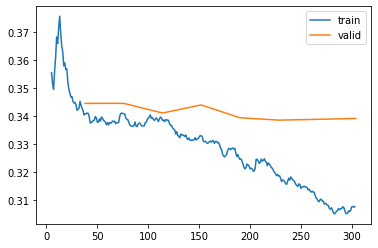

In [83]:
wandb.finish()